# Multi-Label Classification formed on Morphed Data on Banking Services

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'std', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [176]:
client_data= pd.read_csv(".../table_client.csv", sep=";")
contract_data= pd.read_csv(".../table_contrat.csv", sep=";")

# CLIENT DATA EXPLORATION AND FEATURE ENGINEERING

In [177]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10926 entries, 0 to 10925
Data columns (total 6 columns):
ID                10926 non-null int64
DATE_ENTREE       10926 non-null object
DATE_NAISSANCE    10926 non-null object
DET_VOITURE       10926 non-null int64
CSP               10926 non-null object
REVENUS_MOYENS    10926 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 512.2+ KB


In [178]:
client_data.CSP.unique()

array(['Artisan', 'Retraite', 'Cadre', 'Etudiant', 'Profession liberale'], dtype=object)

In [179]:
client_data["DATE_ENTREE"] = pd.to_datetime(client_data["DATE_ENTREE"],format="%Y-%m-%d")
client_data["DATE_NAISSANCE"] = pd.to_datetime(client_data["DATE_NAISSANCE"],format="%Y-%m-%d")

# Client Feature Engineering

In [180]:
#Extracting Age from the Date of Birth
client_data['BIRTH_YEAR'] = pd.DatetimeIndex(client_data['DATE_NAISSANCE']).year

In [181]:
client_data["AGE"]= (2018) - client_data["BIRTH_YEAR"]

In [182]:
client_data["AGE"].describe()

count    10926.000000
mean        49.740161
std         19.629230
min          2.000000
25%         36.000000
50%         50.000000
75%         64.000000
max         98.000000
Name: AGE, dtype: float64

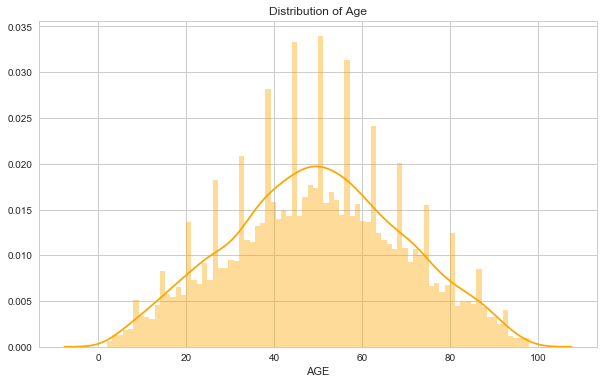

In [183]:
with sns.plotting_context("notebook",font_scale=1):
    sns.set_style("whitegrid")
    sns.distplot(client_data["AGE"].dropna(),
                 bins=80,
                 color="orange")
    plt.title("Distribution of Age")
    plt.show();

In [184]:
#Age Categories
client_data['Jeune'] = client_data['AGE'].map(lambda s: 1 if s <= 25 else 0)
client_data['Age Moyen'] = client_data['AGE'].map(lambda s: 1 if  25 < s <= 50  else 0)
client_data['Aine'] = client_data['AGE'].map(lambda s: 1 if 50 < s <= 75 else 0)
client_data['Vieux'] = client_data['AGE'].map(lambda s: 1 if s > 75 else 0)

In [185]:
#Socio-Professional Categories
from sklearn.preprocessing import LabelEncoder
client_data['CSP'] = LabelEncoder().fit_transform(client_data['CSP'])
client_data['Artisan'] = client_data['CSP'].map(lambda s: 1 if s == 0 else 0)
client_data['Cadre'] = client_data['CSP'].map(lambda s: 1 if  s == 1  else 0)
client_data['Etudiant'] = client_data['CSP'].map(lambda s: 1 if s == 2 else 0)
client_data['Profession liberale'] = client_data['CSP'].map(lambda s: 1 if s == 3 else 0)
client_data['Retraite'] = client_data['CSP'].map(lambda s: 1 if s == 4 else 0)

In [186]:
client_data["REVENUS_MOYENS"].describe()

count    10926.000000
mean      2421.829020
std       1656.855216
min          0.000000
25%       1500.000000
50%       2081.029685
75%       3375.428821
max       9009.922154
Name: REVENUS_MOYENS, dtype: float64

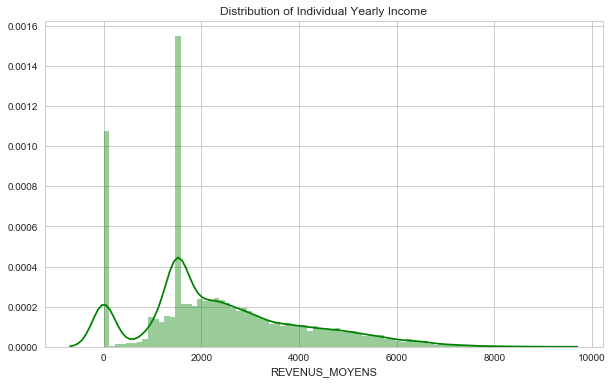

In [187]:
with sns.plotting_context("notebook",font_scale=1):
    sns.set_style("whitegrid")
    sns.distplot(client_data["REVENUS_MOYENS"].dropna(),
                 bins=80,
                 color="green")
    plt.title("Distribution of Individual Yearly Income")
    plt.show();

In [188]:
#Yearly Income Categories
client_data['REVENUS_Groupe1'] = client_data['REVENUS_MOYENS'].map(lambda s: 1 if s <= 1500 else 0)
client_data['REVENUS_Groupe2'] = client_data['REVENUS_MOYENS'].map(lambda s: 1 if  1500 < s <= 2000  else 0)
client_data['REVENUS_Groupe3'] = client_data['REVENUS_MOYENS'].map(lambda s: 1 if 2000 < s <= 3300 else 0)
client_data['REVENUS_Groupe4'] = client_data['REVENUS_MOYENS'].map(lambda s: 1 if s > 3300 else 0)

In [189]:
client_data.drop(["DATE_NAISSANCE","CSP","REVENUS_MOYENS","BIRTH_YEAR","AGE",], axis = 1, inplace = True)

In [190]:
client_data.head()

,ID,DATE_ENTREE,DET_VOITURE,Jeune,Age Moyen,Aine,Vieux,Artisan,Cadre,Etudiant,Profession liberale,Retraite,REVENUS_Groupe1,REVENUS_Groupe2,REVENUS_Groupe3,REVENUS_Groupe4
0,2509621,1970-01-02,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,2571758,1970-01-03,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,2016544,1970-01-04,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,2540057,1970-01-09,1,0,0,0,1,0,0,0,0,1,1,0,0,0
4,2538908,1970-01-09,1,0,0,0,1,0,0,0,0,1,1,0,0,0


In [191]:
agg_client_data= client_data.groupby(['ID']).agg({'DET_VOITURE': sum,
                                                 'Jeune': sum, 'Age Moyen': sum,
                                                 'Aine': sum, 'Vieux': sum, 'Artisan': sum,
                                                 'Cadre': sum, 'Etudiant': sum,
                                                 'Profession liberale': sum, 'Retraite': sum,
                                                 'REVENUS_Groupe1': sum, 'REVENUS_Groupe2': sum,
                                                 'REVENUS_Groupe3': sum, 'REVENUS_Groupe4': sum})

In [192]:
agg_client_data.head()

,DET_VOITURE,Jeune,Age Moyen,Aine,Vieux,Artisan,Cadre,Etudiant,Profession liberale,Retraite,REVENUS_Groupe1,REVENUS_Groupe2,REVENUS_Groupe3,REVENUS_Groupe4
ID,,,,,,,,,,,,,,
1000076,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1000409,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1000537,1,0,1,0,0,0,0,0,1,0,0,0,0,1
1000568,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1000656,1,0,0,1,0,0,0,0,0,1,1,0,0,0


# CONTRACT DATA EXPLORATION AND FEATURE ENGINEERING

In [193]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 5 columns):
PRODUIT           14800 non-null object
SOLDE             14800 non-null float64
ID                14800 non-null int64
DATE_OUVERTURE    14800 non-null object
DATE_CLOTURE      4648 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 578.2+ KB


In [194]:
contract_data["DATE_OUVERTURE"] = pd.to_datetime(contract_data["DATE_OUVERTURE"],format="%Y-%m-%d")
contract_data["DATE_CLOTURE"] = pd.to_datetime(contract_data["DATE_CLOTURE"],format="%Y-%m-%d")

In [195]:
contract_data.head()

,PRODUIT,SOLDE,ID,DATE_OUVERTURE,DATE_CLOTURE
0,Livret A,20000.000000,2509621,1970-01-02,1998-11-27
1,Livret A,20000.000000,2571758,1970-01-03,NaT
2,Assurance Vie,27113.444455,2571758,2001-11-13,NaT
3,Livret A,20000.000000,2016544,1970-01-04,NaT
4,Livret A,20000.000000,2540057,1970-01-09,NaT


In [196]:
contract_data.PRODUIT.unique()

array(['Livret A', 'Assurance Vie', 'PEA', 'Credit Immobilier'], dtype=object)

# Contract Feature Engineering

In [197]:
#Product Categorization
contract_data['PRODUIT'] = LabelEncoder().fit_transform(contract_data['PRODUIT'])
contract_data['Assurance Vie'] = contract_data['PRODUIT'].map(lambda s: 1 if s == 0 else 0)
contract_data['Credit Immobilier'] = contract_data['PRODUIT'].map(lambda s: 1 if  s == 1  else 0)
contract_data['Livret A'] = contract_data['PRODUIT'].map(lambda s: 1 if s == 2 else 0)
contract_data['PEA'] = contract_data['PRODUIT'].map(lambda s: 1 if s == 3 else 0)
contract_data.drop(["PRODUIT"], axis = 1, inplace = True)

In [198]:
contract_data['ANS_CLOTURE'] = pd.DatetimeIndex(contract_data['DATE_CLOTURE']).year
contract_data['ANS_CLOTURE'].fillna(0, inplace=True)

In [199]:
# Determining if a product is ongoing or not
contract_data['ONGOING'] = contract_data['ANS_CLOTURE'].map(lambda s: 1 if s == 0.0 else 0)
contract_data.drop(["DATE_CLOTURE","ANS_CLOTURE"], axis = 1, inplace = True)

In [200]:
agg_contract_data= contract_data.groupby(['ID']).agg({'Assurance Vie':sum, 'Credit Immobilier': sum, 
                                                      'Livret A': sum, 'PEA': sum, 'SOLDE': sum, 'ONGOING': sum})

In [201]:
agg_contract_data['ONGOING_0'] = agg_contract_data['ONGOING'].map(lambda s: 1 if s == 0 else 0)
agg_contract_data['ONGOING_1'] = agg_contract_data['ONGOING'].map(lambda s: 1 if s == 1 else 0)
agg_contract_data['ONGOING_2'] = agg_contract_data['ONGOING'].map(lambda s: 1 if s == 2 else 0)
agg_contract_data['ONGOING_3'] = agg_contract_data['ONGOING'].map(lambda s: 1 if s == 3 else 0)
agg_contract_data['ONGOING_4'] = agg_contract_data['ONGOING'].map(lambda s: 1 if s == 4 else 0)
agg_contract_data.drop(["ONGOING"], axis = 1, inplace = True)

In [202]:
#Looking into the Solde
agg_contract_data["SOLDE"].describe()

count     10926.000000
mean      39629.782442
std       73669.368822
min     -335674.406640
25%        5443.780184
50%       20000.000000
75%       44784.106557
max      738780.620313
Name: SOLDE, dtype: float64

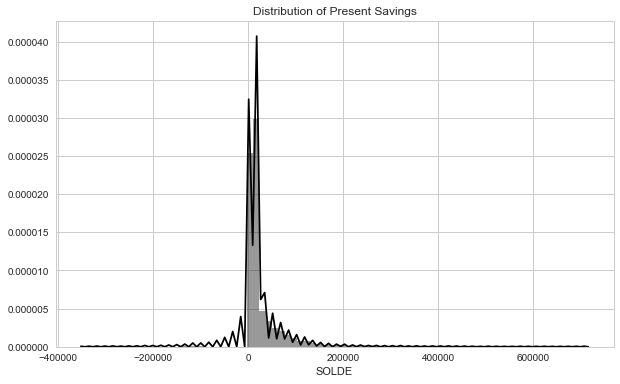

In [203]:
with sns.plotting_context("notebook",font_scale=1):
    sns.set_style("whitegrid")
    sns.distplot(contract_data["SOLDE"].dropna(),
                 bins=80,
                 color="black")
    plt.title("Distribution of Present Savings")
    plt.show();

In [204]:
agg_contract_data['SOLDE_Groupe1'] = agg_contract_data['SOLDE'].map(lambda s: 1 if s <= 1000 else 0)
agg_contract_data['SOLDE_Groupe2'] = agg_contract_data['SOLDE'].map(lambda s: 1 if  1000 < s <= 5500  else 0)
agg_contract_data['SOLDE_Groupe3'] = agg_contract_data['SOLDE'].map(lambda s: 1 if 5500 < s <= 20000 else 0)
agg_contract_data['SOLDE_Groupe4'] = agg_contract_data['SOLDE'].map(lambda s: 1 if 20000 < s <= 45000 else 0)
agg_contract_data['SOLDE_Groupe5'] = agg_contract_data['SOLDE'].map(lambda s: 1 if s > 45000 else 0)
agg_contract_data.drop(["SOLDE"], axis = 1, inplace = True)

In [205]:
agg_contract_data.head()

,Assurance Vie,Credit Immobilier,Livret A,PEA,ONGOING_0,ONGOING_1,ONGOING_2,ONGOING_3,ONGOING_4,SOLDE_Groupe1,SOLDE_Groupe2,SOLDE_Groupe3,SOLDE_Groupe4,SOLDE_Groupe5
ID,,,,,,,,,,,,,,
1000076,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1000409,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1000537,1,0,1,0,0,0,1,0,0,0,0,0,0,1
1000568,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1000656,1,0,1,0,0,1,0,0,0,0,0,0,0,1


# Multi-Label classifier built using Logistic Regression complemented by Classifier Chains

In [206]:
Alldata = pd.concat([agg_contract_data, agg_client_data], axis=1)

In [207]:
Alldata.head()

,Assurance Vie,Credit Immobilier,Livret A,PEA,ONGOING_0,ONGOING_1,ONGOING_2,ONGOING_3,ONGOING_4,SOLDE_Groupe1,...,Vieux,Artisan,Cadre,Etudiant,Profession liberale,Retraite,REVENUS_Groupe1,REVENUS_Groupe2,REVENUS_Groupe3,REVENUS_Groupe4
ID,,,,,,,,,,,,,,,,,,,,,
1000076,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1000409,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1000537,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1000568,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1000656,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


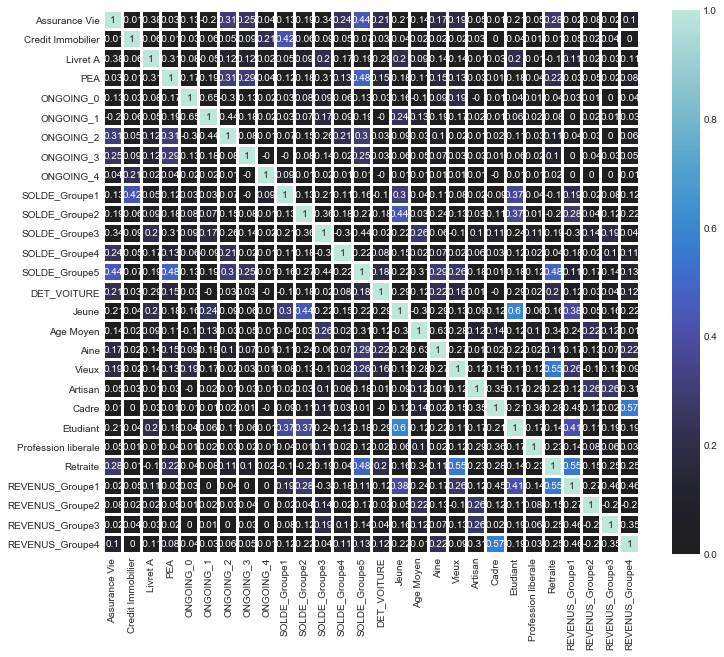

In [208]:
correlat_matrix = Alldata.corr().round(2) 
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlat_matrix, center=0, vmin=0, vmax=1, cmap = 'icefire_r', linewidths=2.0, annot=True, ax=ax); 
plt.show()

In [209]:
#Setting up the dataset for subjecting it to Algorithms
from sklearn.model_selection import train_test_split

y_Assurance= Alldata[["Assurance Vie", "Credit Immobilier", "Livret A", "PEA"]]
x_Assurance= Alldata.drop(["Assurance Vie", "Credit Immobilier", "Livret A", "PEA", "DET_VOITURE" ], axis = 1 )
X_train1, X_test1, Y_train1, Y_test1= train_test_split(x_Assurance, y_Assurance, test_size=0.2, random_state=0)

In [210]:
X_train1.shape

(8740, 24)

In [211]:
X_test1.shape

(2186, 24)

In [212]:
Y_train1.shape

(8740, 4)

In [213]:
#Loading Algorithm Libraries

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', n_estimators = 1000, 
                               oob_score=False, random_state=None, verbose=0, warm_start=False) 
#from sklearn.linear_model import LogisticRegression
#LogisticRegression(C = 10.0)

#Creating a submissions file
classifier_chains = pd.read_csv('.../classifier_chains.csv')
classifier_chains = pd.DataFrame(index=Y_test1.index.copy())

cols_target= ["Assurance Vie", "Credit Immobilier", "Livret A", "PEA"]

def add_feature(X, feature_to_add):
    '''
    Returns a sparse feature matrix with the added feature.
    The feature_to_add can also be considered a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

for label in cols_target:
    print('\n')
    print('... Processing {}'.format(label))
    y = Y_train1[label]
    # train the model using X_train & y
    model.fit(X_train1,y)
    # compute the training accuracy
    y_pred_X = model.predict(X_train1)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from X_test
    test_y = model.predict(X_test1)
    #test_y_prob = model.predict_proba(X_test1)[:,1] #can be used to give a probability output
    classifier_chains[label]= test_y
    #Checking overall accuracy
    y_test = Y_test1[label]
    print('Testing Accuracy is {}'.format(accuracy_score(y_test,test_y)))
    # chain current label to X_dtm
    X_train1 = add_feature(X_train1, y)
    print('Shape of X_train is now {}'.format(X_train1.shape))
    # chain current label predictions to X_test
    X_test1 = add_feature(X_test1, test_y)
    print('Shape of X_test is now {}'.format(X_test1.shape))



... Processing Assurance Vie
Training Accuracy is 0.8195652173913044
Testing Accuracy is 0.7795059469350412
Shape of X_train is now (8740, 25)
Shape of X_test is now (2186, 25)


... Processing Credit Immobilier
Training Accuracy is 0.9975972540045767
Testing Accuracy is 0.9945105215004575
Shape of X_train is now (8740, 26)
Shape of X_test is now (2186, 26)


... Processing Livret A
Training Accuracy is 0.884324942791762
Testing Accuracy is 0.8083257090576396
Shape of X_train is now (8740, 27)
Shape of X_test is now (2186, 27)


... Processing PEA
Training Accuracy is 0.9687643020594966
Testing Accuracy is 0.7602927721866423
Shape of X_train is now (8740, 28)
Shape of X_test is now (2186, 28)


In [214]:
classifier_chains.head()

,Assurance Vie,Credit Immobilier,Livret A,PEA
ID,,,,
1523927,0,0,1,0
2997250,0,0,1,0
1938609,0,0,1,1
2257604,0,0,1,0
2563279,1,0,1,1


In [219]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,27):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 24 (0.325145)
2. feature 26 (0.152053)
3. feature 9 (0.124523)
4. feature 2 (0.069468)
5. feature 3 (0.052673)
6. feature 7 (0.046097)
7. feature 8 (0.031659)
8. feature 0 (0.031448)
9. feature 1 (0.025044)
10. feature 6 (0.017613)
11. feature 10 (0.014867)
12. feature 5 (0.013495)
13. feature 19 (0.012247)
14. feature 25 (0.010002)
15. feature 20 (0.008525)
16. feature 13 (0.008427)
17. feature 11 (0.007834)
18. feature 17 (0.007416)
19. feature 14 (0.006394)
20. feature 12 (0.006115)
21. feature 23 (0.005784)
22. feature 18 (0.004957)
23. feature 22 (0.004836)
24. feature 15 (0.004409)
25. feature 16 (0.004344)
26. feature 21 (0.003791)
27. feature 4 (0.000833)
